# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The dataset is located [here](https://drive.google.com/file/d/1z1gYSD32ktbHuKSzB5JVS_u4YsLibh5F/view?usp=sharing), please download it and place it in the data folder.

In [2]:
# loading the data:
data = pd.read_csv('../data/Wholesale_customer_data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
# Your code here:
data.head()
#We have two columns which tell about the channel and region where the customers 
#makes his/her purchases. Then we have 6 columns with the type of products and the money
#spent for each. 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.info()
#No categorical data to convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.isna().sum()
#No missing data to remove

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.corr()
#High correlation between Grocery and Detergents_Paper

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [8]:
data.describe()
#Maxixum values for Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen should be removed as they can be considered outliers. 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


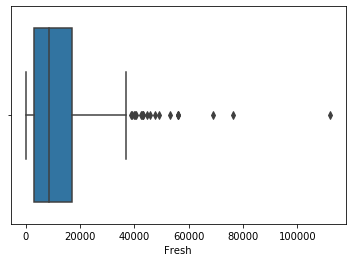

In [9]:
#Check for outliers using boxplots
import seaborn as sns
sns.boxplot(x=data['Fresh'])
#Paolo: good idea the box plot, you could try to plot all of the boxplots in a single graph to have a 
# better overview

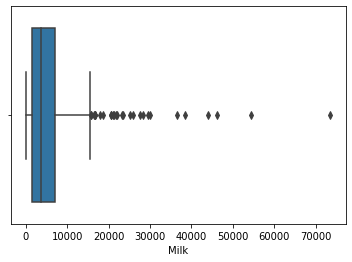

In [10]:
sns.boxplot(x=data['Milk'])

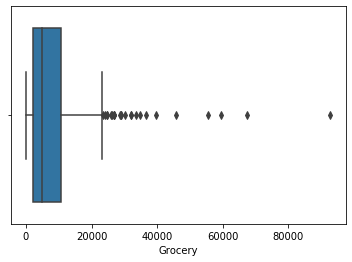

In [11]:
sns.boxplot(x=data['Grocery'])

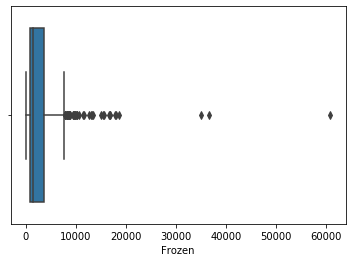

In [12]:
sns.boxplot(x=data['Frozen'])

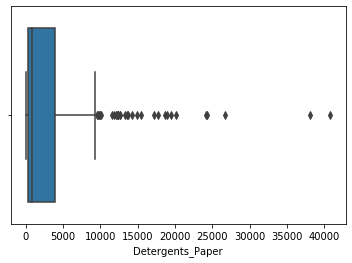

In [13]:
sns.boxplot(x=data['Detergents_Paper'])

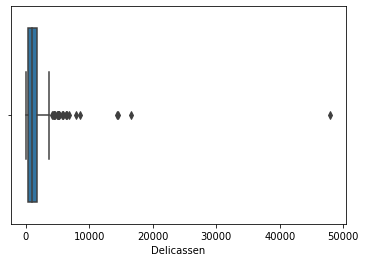

In [14]:
sns.boxplot(x=data['Delicassen'])

In [16]:
data.skew()
#Right-Skewed: all variables referring to type of product are positive. 

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

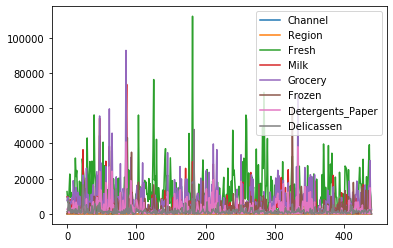

In [17]:
data.plot()
#Paolo: I find this plot difficult to use to extract insights

In [ ]:
#Paolo: plotting is a good idea, removing outliers is always risky when we don not know a lot about the data


In [ ]:
#Paolo: how about the question about the pareto principle at the beginning?

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [18]:
# Your code here
from scipy.stats import zscore
from scipy import stats
data= data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
#Paolo- ok but consider replotting to check what or how many data you have removed

In [25]:
# Your comment here
#Removed all outliers. It seems there are some exceptional cases in which customers
#spent a big amount of money which cannnot be applied as a "normal" action for 
#most of the sample. 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [26]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler=StandardScaler()
customers_scale=scaler.fit(data)
customers_scale=scaler.transform(data)
customers_scale=pd.DataFrame(customers_scale)
customers_scale
#Paolo: ok

,0,1,2,3,4,5,6,7,8,9
0,1.478044,0.587722,0.199569,1.051409,0.115837,-0.801844,0.093798,0.082291,-1.399278,-0.454969
1,1.478044,0.587722,-0.372655,1.085254,0.427079,-0.270462,0.286944,0.442510,-1.399278,-0.454969
2,1.478044,0.587722,-0.444438,0.865042,0.134911,-0.049739,0.356526,5.432937,2.372916,-0.454969
3,-0.676570,0.587722,0.260340,-0.807866,-0.402125,1.322997,-0.582369,0.452379,-0.860393,-0.454969
4,1.478044,0.587722,1.213706,0.118255,0.059543,0.468598,-0.186092,3.246130,1.834031,-0.454969
...,...,...,...,...,...,...,...,...,...,...
409,-0.676570,0.587722,1.936429,1.577764,1.428729,3.633548,-0.683778,0.794505,-0.860393,-0.454969
410,-0.676570,0.587722,2.907639,-0.756220,-0.938230,0.672844,-0.711549,0.911288,0.756261,-0.454969
411,1.478044,0.587722,0.389426,2.333122,3.633321,-0.725295,3.890255,0.517350,1.295146,-0.454969
412,-0.676570,0.587722,-0.043004,-0.635345,-0.710575,-0.518989,-0.688147,0.729534,0.217376,-0.454969


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [21]:
# Your code here:
from sklearn.cluster import KMeans
data_k_means=KMeans().fit(customers_scale)
data['labels']=data_k_means.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Count the values in `labels`.

In [27]:
# Your code here:
data['labels'].value_counts()

3    127
0     81
2     69
5     35
1     35
4     34
6     21
7     12
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [28]:
# Your code here
from sklearn.cluster import DBSCAN
data_dbscan=DBSCAN(eps=0.5).fit(customers_scale)
data['labels_DBSCAN']=data_dbscan.labels_
#Paolo: watch out for the settingwithcopy warning

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Count the values in `labels_DBSCAN`.

In [24]:
# Your code here
data['labels_DBSCAN'].value_counts()
#Paolo: dbscan identifies -1 with noise, those data are not labelled properly, check here
#https://scikit-learn.org/stable/modules/clustering.html#dbscan

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

In [ ]:
#Paolo: what about challenge5? Could you try, visualizing the clusters is an important part

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here